In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as ds

In [2]:
# importing data from file to numpy array
def import_data(f):
    X = np.loadtxt(f)
    return X

In [3]:
# least square function with parameters x: data points and y: corresponding outputs of data 
def least_square(x, y, rcond=None):
    Astar = np.linalg.lstsq(x, y, rcond)
    return Astar[0]

### Part 1

In [4]:
file1 = "linear_function_data.txt"
data_1 = import_data(file1) # read the data
# separate the columns
x = data_1[:,0:1] 
y = data_1[:,1:2]
# calculate least square solution
A = least_square(x, y)

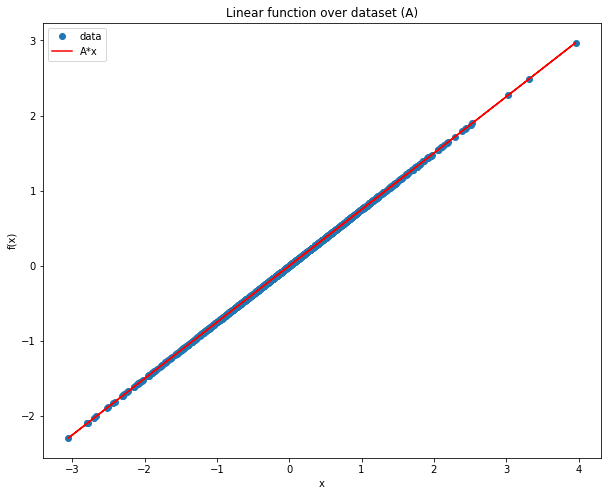

In [5]:
# plot the function over data points
plt.figure(figsize=(10,8))
plt.plot(x, y, 'o')
plt.plot(x, A*x, 'r')
plt.legend(['data', 'A*x'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Linear function over dataset (A)")
plt.savefig('lindataA.png')
plt.show()

### Part 2

In [6]:
file2 = "nonlinear_function_data.txt"
data_2 = import_data(file2)
# separate the columns
x2 = data_2[:,0:1]
y2 = data_2[:,1:2]
# calculate least square solution
A2 = least_square(x, y)

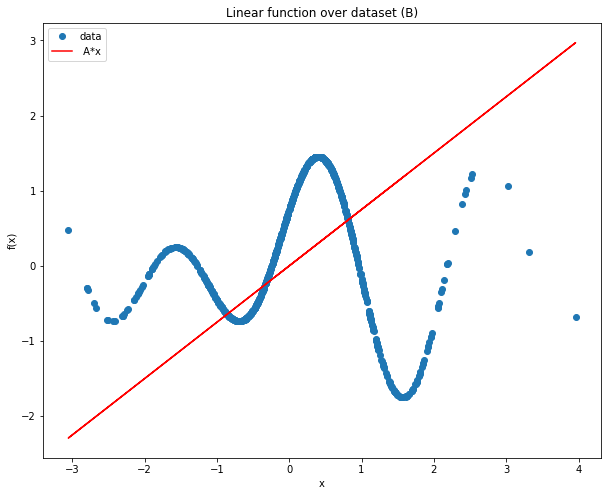

In [7]:
# plot the function over data points
plt.figure(figsize=(10,8))
plt.plot(x2, y2, 'o')
plt.plot(x2, A2*x2, 'r')
plt.legend(['data', ' A*x'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Linear function over dataset (B)")
plt.savefig('lindataB.png')
plt.show()

### Part 3

In [8]:
def create_basis(X, L):
    basis = np.zeros((L, X.shape[1]))
    rand_arr = np.random.choice(X.shape[0], L, replace=False) # generate L number of indices randomly
    indices = np.sort(rand_arr) # then sort them
    for i in range(0, L):
        x_l = X[indices[i]] # get a randomly selected data point as center basis
        basis[i]= x_l
    distance = np.zeros((L, L))
    for i in range(0, L):
        dist = get_distance(basis[i], basis) # distance array
        distance[i, :] = dist
        
    eps = 0.05 * np.max(distance) # calculate epsilon
    return basis, eps

In [9]:
# calculating radial basis functions, numpy array X: data points, scalar L
def get_RBF(X, L, basis, eps):
    RBF = np.zeros((X.shape[0], L)) # initialize
    for i in range(L):
        dist = get_distance(basis[i], X) # distance array
        RBF[:, i] = dist
        
    epsilon = eps ** 2 #square of epsilon
    RBF = RBF / epsilon # divide the distance with epsilon
    RBF = np.exp(-RBF) # take exponential
    return RBF

In [10]:
# x_l scalar, data points X numpy array
def get_distance(x_l, X):
    d_mat = np.zeros(X.shape) # initialize
    d_mat = (x_l-X)**2 # square distance
    d_mat = np.sum(d_mat, axis = 1) # sum over axis 1
    return d_mat

### L=2 on nonlinear dataset

In [11]:
L_2 = 2
basis_2, eps_2 = create_basis(x2,L_2) # create basis with defined L
rbf_2 = get_RBF(x2, L_2, basis_2, eps_2) # calculate RBF
C_2 = least_square(rbf_2, y2) # calculate least square solution with radial basis functions
funct2 = rbf_2.dot(C_2) # dot product of C and rbf to create function

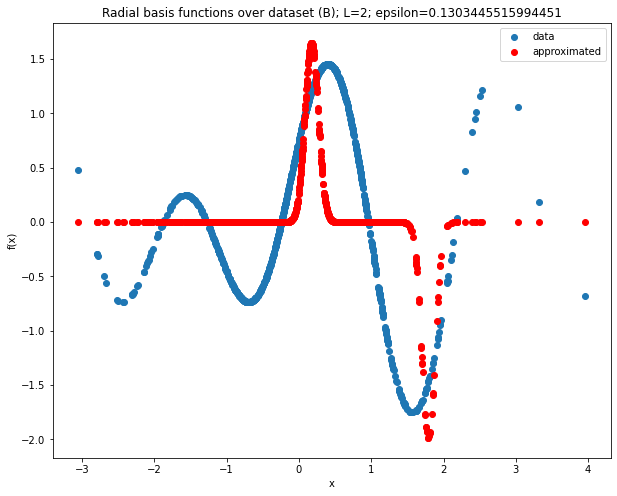

In [12]:
# plot the function over data points
plt.figure(figsize=(10,8))
plt.scatter(x2, y2)
plt.scatter(x2, funct2, c='r')
plt.legend(['data', 'approximated'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Radial basis functions over dataset (B); L="+str(L_2)+"; epsilon="+str(eps_2))
plt.savefig('nonlin2.png')
plt.show()

### L=5 on nonlinear dataset

In [13]:
L_5 = 5
basis_5, eps_5 = create_basis(x2,L_5) # create basis with defined L
rbf_5 = get_RBF(x2, L_5, basis_5, eps_5) # calculate RBF
C_5 = least_square(rbf_5, y2) # calculate least square solution with radial basis functions
funct5 = rbf_5.dot(C_5) # dot product of C and rbf to create function

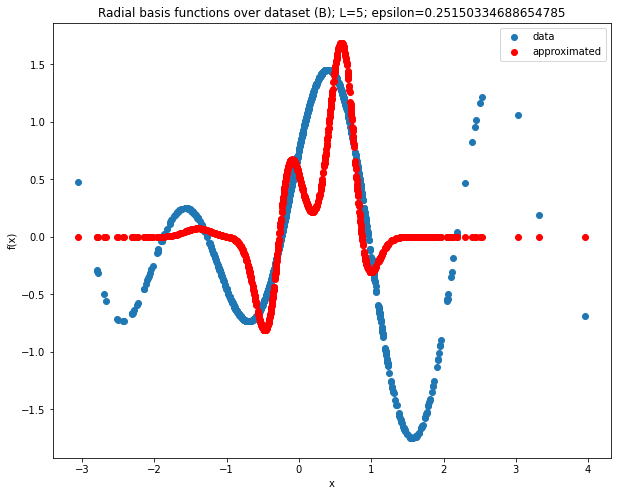

In [14]:
# plot the function over data points
plt.figure(figsize=(10,8))
plt.scatter(x2, y2)
plt.scatter(x2, funct5, c='r')
plt.legend(['data', 'approximated'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Radial basis functions over dataset (B); L="+str(L_5)+"; epsilon="+str(eps_5))
plt.savefig('nonlin5.png')
plt.show()

### L = 10 on nonlinear dataset

In [15]:
L = 10
basis, eps = create_basis(x2, L) # create basis with defined L
rbf = get_RBF(x2, L, basis, eps) # calculate RBF
C = least_square(rbf, y2) # calculate least square solution with radial basis functions
funct = rbf.dot(C) # dot product of C and rbf to create function

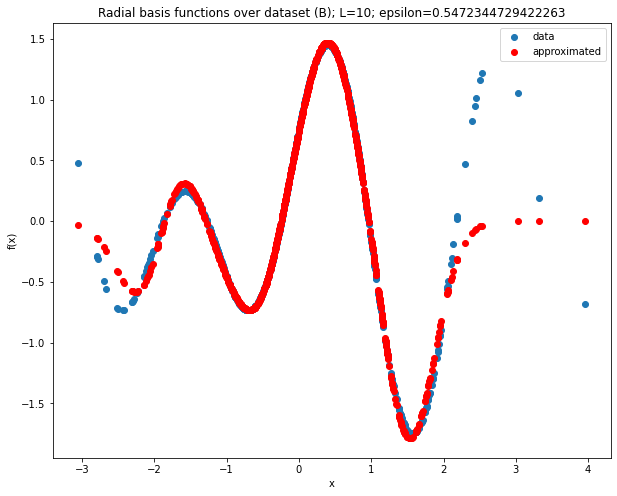

In [16]:
# plot the function over data points
plt.figure(figsize=(10,8))
plt.scatter(x2, y2)
plt.scatter(x2, funct, c='r')
plt.legend(['data', 'approximated'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Radial basis functions over dataset (B); L="+str(L)+"; epsilon="+str(eps))
plt.savefig('nonlin10.png')
plt.show()

### L=20 on nonlinear dataset

In [17]:
L_h = 20
basis_h, eps_20 = create_basis(x2,L_h) # create basis with defined L
rbf_h = get_RBF(x2, L_h, basis_h, eps_20)  # calculate RBF
C_h = least_square(rbf_h, y2) # calculate least square solution with radial basis functions
funct_h = rbf_h.dot(C_h) # dot product of C and rbf to create function

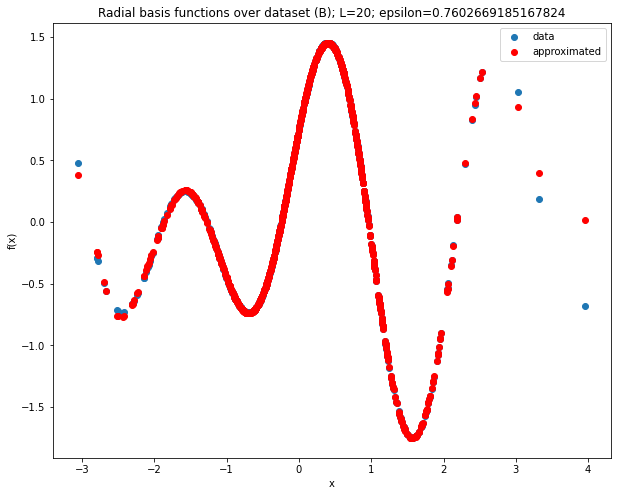

In [18]:
# plot the function over data points
plt.figure(figsize=(10,8))
plt.scatter(x2, y2)
plt.scatter(x2, funct_h, c='r')
plt.legend(['data', 'approximated'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Radial basis functions over dataset (B); L="+str(L_h)+"; epsilon="+str(eps_20))
plt.savefig('nonlin20.png')
plt.show()

### L=5 on linear dataset

In [19]:
L_lin = 5
bas_lin, eps_lin = create_basis(x, L_lin) # create basis with defined L
rbf_lin = get_RBF(x, L_lin, bas_lin, eps_lin)
C_lin = least_square(rbf_lin, y) # calculate least square solution with radial basis functions
funct_lin = rbf_lin.dot(C_lin) # dot product of C and rbf to create function

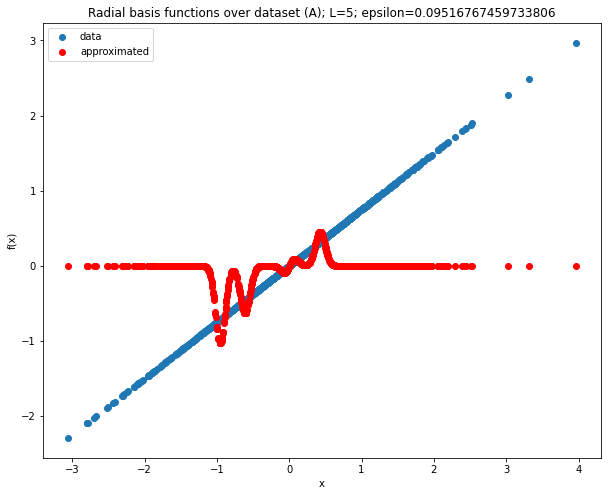

In [20]:
# plot the function over data points
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.scatter(x, funct_lin, c='r')
plt.legend(['data', 'approximated'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Radial basis functions over dataset (A); L="+str(L_lin)+"; epsilon="+str(eps_lin))
plt.savefig('lin5.png')
plt.show()

### L=10 on linear dataset

In [21]:
L_ = 10
bas_, eps_ = create_basis(x, L_) # create basis with defined L
rbf_ = get_RBF(x, L_, bas_, eps_)  # calculate RBF
C_ = least_square(rbf_, y) # calculate least square solution with radial basis functions
funct_ = rbf_.dot(C_) # dot product of C and rbf to create function

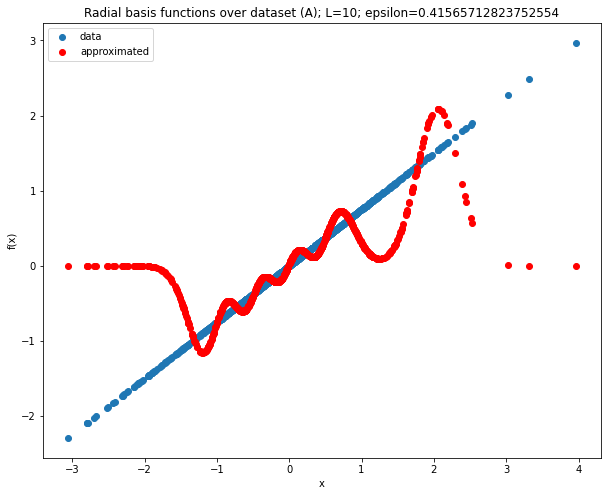

In [22]:
# plot the function over data points
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.scatter(x, funct_, c='r')
plt.legend(['data', 'approximated'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Radial basis functions over dataset (A); L="+str(L_)+"; epsilon="+str(eps_))
plt.savefig('lin10.png')
plt.show()

### L=20 on linear dataset

In [23]:
L20_ = 20
bas20_, eps20_ = create_basis(x, L20_) # create basis with defined L
rbf20_ = get_RBF(x, L20_, bas20_, eps20_)  # calculate RBF
C20_ = least_square(rbf20_, y) # calculate least square solution with radial basis functions
funct20_ = rbf20_.dot(C20_) # dot product of C and rbf to create function

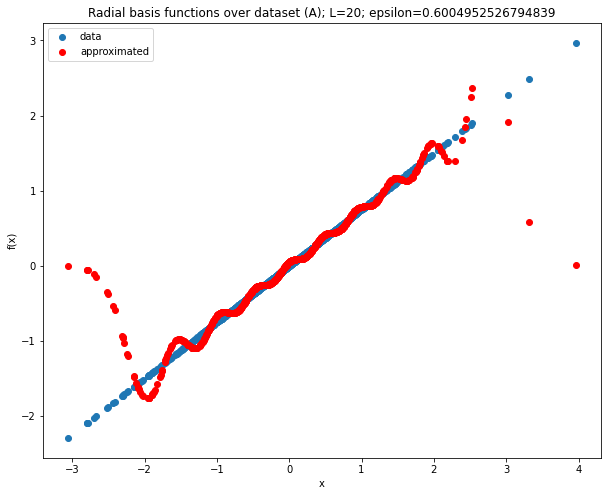

In [24]:
# plot the function over data points
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.scatter(x, funct20_, c='r')
plt.legend(['data', 'approximated'])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Radial basis functions over dataset (A); L="+str(L20_)+"; epsilon="+str(eps20_))
plt.savefig('lin20.png')
plt.show()